In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import os

In [ ]:
x_train = pickle.load(open('/content/drive/My Drive/ML Mini/feature_gray_train.pkl','rb'))
y_train = pickle.load(open('/content/drive/My Drive/ML Mini/label_gray_train.pkl','rb'))

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0, 3417],
       [   1, 3391],
       [   2, 1269]])

In [ ]:
x_test = pickle.load(open('/content/drive/My Drive/ML Mini/feature_gray_test.pkl','rb'))
y_test = pickle.load(open('/content/drive/My Drive/ML Mini/label_gray_test.pkl','rb'))

In [ ]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  0, 199],
       [  1, 225],
       [  2,  76]])

In [ ]:
x_train = x_train.reshape(-1,100*100)

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smote = SMOTE()

In [ ]:
x,y = smote.fit_sample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0, 3417],
       [   1, 3417],
       [   2, 3417]])

In [ ]:
x = x.reshape(-1,100,100,1)

In [ ]:
x.shape

(10251, 100, 100, 1)

In [ ]:
x = x/255


In [ ]:
import tensorflow as tf
import numpy as np
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, MaxPooling2D, Conv2D, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(128, (4,4) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16, input_shape=x.shape[1:], activation='relu'))

model.add(Dense(3, activation='sigmoid'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9,beta_2=0.999),
             metrics=['accuracy'])

history = model.fit(x,y, batch_size=20, epochs=20, validation_split=0.1)

Epoch 1/20
462/462 [==============================] - 8s 16ms/step - loss: 0.2306 - accuracy: 0.9576 - val_loss: 0.1805 - val_accuracy: 0.9600
Epoch 2/20
462/462 [==============================] - 7s 15ms/step - loss: 0.0594 - accuracy: 0.9816 - val_loss: 0.1292 - val_accuracy: 0.9708
Epoch 3/20
462/462 [==============================] - 7s 15ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.1284 - val_accuracy: 0.9795
Epoch 4/20
462/462 [==============================] - 7s 15ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.1861 - val_accuracy: 0.9678
Epoch 5/20
462/462 [==============================] - 7s 15ms/step - loss: 0.0385 - accuracy: 0.9864 - val_loss: 0.1439 - val_accuracy: 0.9766
Epoch 6/20
462/462 [==============================] - 7s 15ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.1724 - val_accuracy: 0.9737
Epoch 7/20
462/462 [==============================] - 7s 15ms/step - loss: 0.0330 - accuracy: 0.9884 - val_loss: 0.2901 - val_accuracy: 0.9561

In [ ]:
model.save("mlminimodel")

INFO:tensorflow:Assets written to: mlminimodel/assets


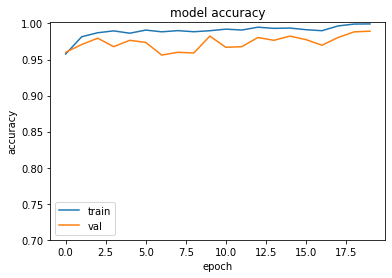

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(ymin=0.7) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

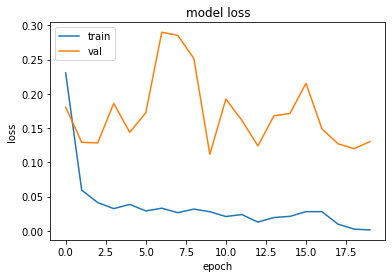

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
x_test = pickle.load(open('/content/drive/My Drive/pickle/feature_gray_test.pkl','rb'))
y_test = pickle.load(open('/content/drive/My Drive/pickle/label_gray_test.pkl','rb'))
x_test = np.array(x_test)

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = x_test/255

In [ ]:
y_test = np.array(y_test)

In [ ]:
x_test = x_test.reshape(-1,100,100,1)

In [ ]:
predictions = model.predict(x_test)

In [ ]:

new_predicted_value = []
for i in range(500):
    predicted = np.argmax(predictions[i])
    new_predicted_value.append(predicted)

In [ ]:
from sklearn import metrics

In [ ]:

confusion_matrix = metrics.confusion_matrix(y_test, new_predicted_value, labels=[0, 1, 2])

In [ ]:
print(confusion_matrix)

[[ 27   3   0]
 [  0 238   1]
 [  0   0 231]]


In [ ]:
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1] +confusion_matrix[2,2])/5  

In [ ]:
print(accuracy)

99.2


In [ ]:
print(f"{accuracy}%")

99.2%


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 97, 97, 128)       2176      
_________________________________________________________________
activation_9 (Activation)    (None, 97, 97, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 64)        73792     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 32)       

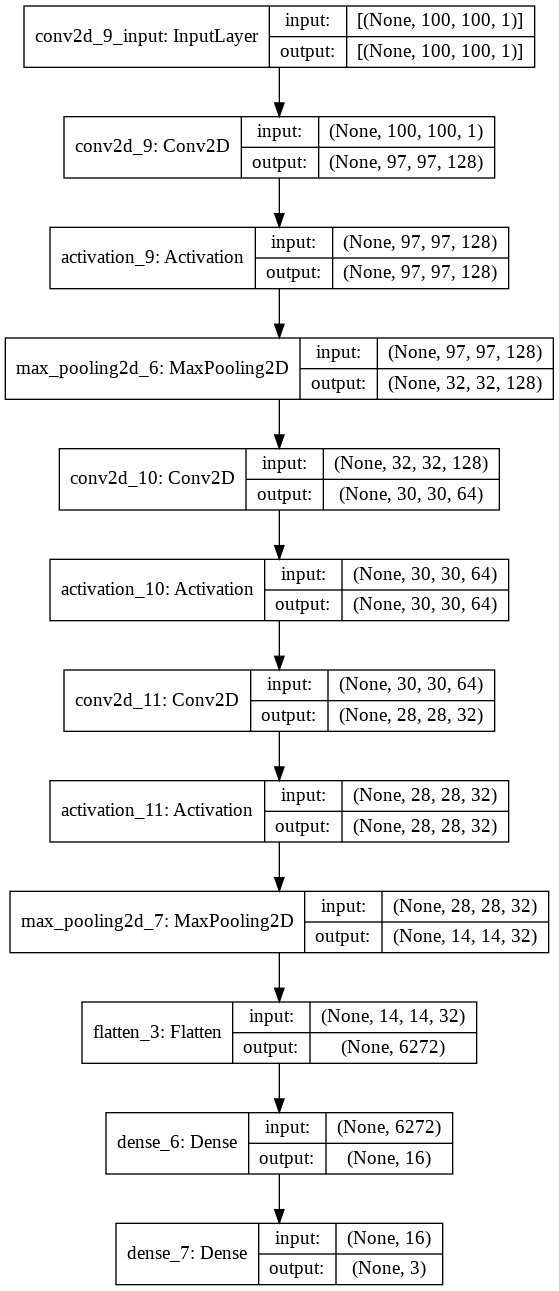

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)

In [ ]:
!zip -r output_folder mlminimodel

updating: mlminimodel/ (stored 0%)
updating: mlminimodel/assets/ (stored 0%)
updating: mlminimodel/keras_metadata.pb (deflated 91%)
updating: mlminimodel/variables/ (stored 0%)
updating: mlminimodel/variables/variables.index (deflated 66%)
updating: mlminimodel/variables/variables.data-00000-of-00001 (deflated 28%)
updating: mlminimodel/saved_model.pb (deflated 89%)
